In [103]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.signal import find_peaks
from scipy.signal import windows
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Update matplotlib settings
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False
})
plt.rcParams['font.size'] = 14

## Task 1

In [105]:
# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 1')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace('.', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))


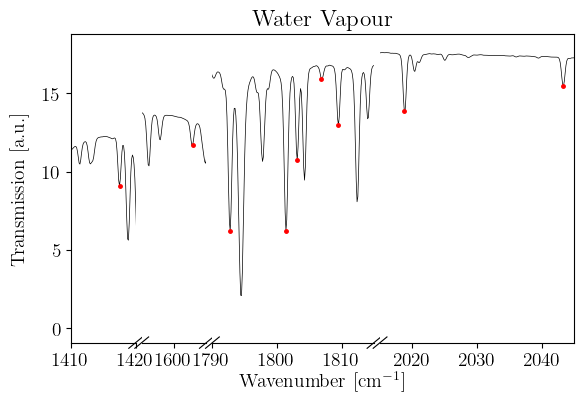

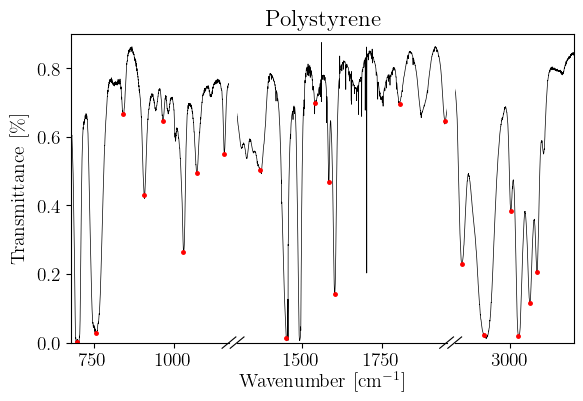

Overall Average Change in Wavenumber: 0.92
Overall Standard Deviation of Change in Wavenumber: 1.04
Water Vapour Data:
   Theoretical  Experimental  Change in Wavenumber  Percentage Change
0      1416.08      1417.500                 1.420           0.100277
1      1601.20      1602.875                 1.675           0.104609
2      1792.65      1792.750                 0.100           0.005578
3      1799.61      1801.375                 1.765           0.098077
4      1802.47      1803.125                 0.655           0.036339
5      1807.70      1806.875                -0.825          -0.045638
6      1810.62      1809.500                -1.120          -0.061857
7      2018.32      2018.750                 0.430           0.021305
8      2041.30      2043.375                 2.075           0.101651

Polystyrene Data:
    Theoretical  Experimental  Change in Wavenumber  Percentage Change
0        699.45       699.250                -0.200          -0.028594
1        756.58     

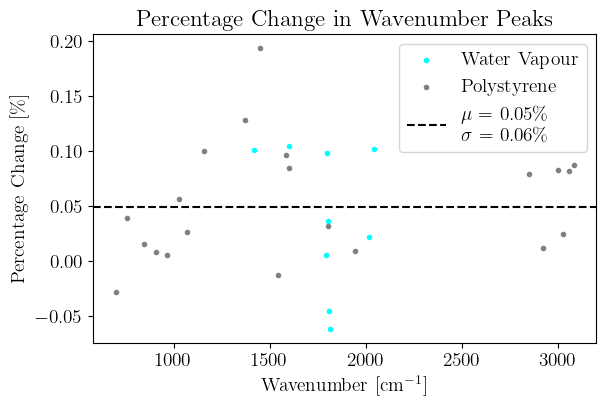

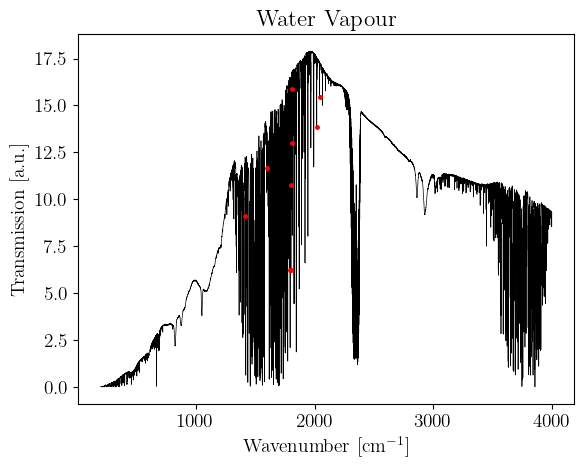

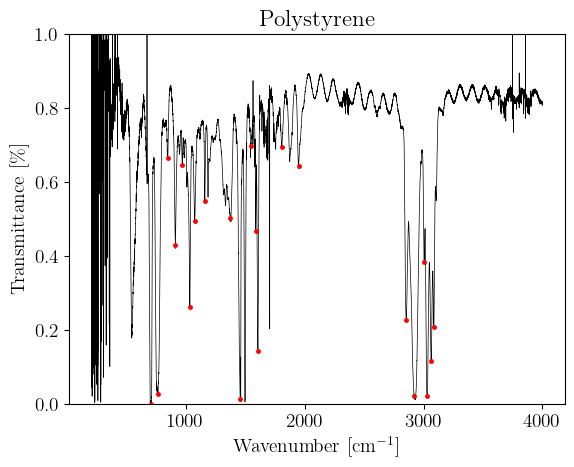

In [106]:
# Define the peak ranges for Water vapor and Polystyrene
peak_ranges = {
    'Water Vapour': [1416.08, 1601.20, 1792.65, 1799.61, 1802.47, 1807.70, 1810.62, 2018.32, 2041.3],
    'Polystyrene': [699.45, 756.58, 842.0, 906.8, 965.7, 1028.3, 1069.1, 1154.6, 1449.7, 1368.5, 1542.2, 1583.1, 1601.4, 1803.8, 1945.2, 2850.0, 2920.9, 3001.4, 3026.4, 3060.0, 3082.2]
}

# Function to find dips within a specified range
def find_dips_in_range(x, y, dip_values, prominence=None):
    inverted_y = -y
    if prominence:
        dips, _ = find_peaks(inverted_y, prominence=prominence)
    else:
        dips, _ = find_peaks(inverted_y)
    closest_dips = []
    for dip in dip_values:
        closest_dip = min(dips, key=lambda d: abs(x[d] - dip))
        if abs(x[closest_dip] - dip) < 4:
            closest_dips.append(closest_dip)
    return closest_dips

# Function to calculate percentage change
def calculate_percentage_change(theoretical, experimental):
    return [(exp - theo) / theo * 100 for theo, exp in zip(theoretical, experimental)]

# Store percentage changes for plotting
percentage_changes = {}

# Store Water Vapour y values for normalization
water_vapour_y = None

# Plot Water Vapour data
for file, file_data in data:
    if 'Water Vapour' in file:
        # Convert the data to a numpy array
        data_array = np.vstack(file_data)
        
        # Get data
        x = data_array[:, 0]
        y = data_array[:, 1]
        
        # Store Water Vapour y values
        water_vapour_y = y
        
        # Create a new figure with broken axes
        bax = brokenaxes(xlims=((1410, 1420), (1595, 1605), (1790, 1815), (2015, 2045)), wspace=.05)
        # Set y-axis formatter to remove decimal points for each subplot
        for ax in bax.axs:
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))
        
        # Plot
        bax.plot(x, y, color='black', linewidth=0.5)
        
        # Remove the .asc extension from the file name
        file_name_without_ext = os.path.splitext(file)[0]
        
        # Set the title of the plot
        bax.set_title(file_name_without_ext)
        
        # Set the labels of the x and y axes
        bax.set_xlabel('Wavenumber [cm$^{-1}$]', labelpad=20)
        bax.set_ylabel('Transmission [a.u.]')
        bax.fig.set_size_inches(set_size(469))
        
        # Check if the file name matches any key in the peak_ranges dictionary
        for key, dip_values in peak_ranges.items():
            if key in file_name_without_ext:
                # Determine prominence based on the key
                prominence = 0.3 if key == 'Water Vapour' else None
                # Find dips within the specified range
                dips_in_range = find_dips_in_range(x, y, dip_values, prominence)
                experimental_dips = [x[dip] for dip in dips_in_range]
                # Ensure the lengths match before calculating percentage changes
                if len(dip_values) == len(experimental_dips):
                    # Calculate percentage changes
                    percentage_changes[key] = (dip_values, experimental_dips, calculate_percentage_change(dip_values, experimental_dips))
                else:
                    print(f"Warning: Length mismatch for {key}. Theoretical: {len(dip_values)}, Experimental: {len(experimental_dips)}")
                # Plot the dips
                bax.plot(x[dips_in_range], y[dips_in_range], ".", color="red", markersize=5)
                
            
        bax.big_ax.spines['right'].set_visible(True)
        bax.big_ax.spines['top'].set_visible(True)
        
        plt.show()

# Plot Polystyrene data
for file, file_data in data:
    if 'Polystyrene' in file:
        # Convert the data to a numpy array
        data_array = np.vstack(file_data)
        
        # Get data
        x = data_array[:, 0]
        y = data_array[:, 1]
        
        # Normalize Polystyrene y values by Water Vapour y values
        if water_vapour_y is not None:
            y = np.abs(y) / np.abs(water_vapour_y)
        
        # Create a new figure with broken axes
        bax = brokenaxes(xlims=((680,1170),  (1300, 1950), (2830, 3200) ), wspace=0.05)
        
        # Plot
        bax.plot(x, y, color='black', linewidth=0.5)
        
        # Remove the .asc extension from the file name
        file_name_without_ext = os.path.splitext(file)[0]
        
        # Set the title of the plot
        bax.set_title(file_name_without_ext)
        
        # Set the labels of the x and y axes
        bax.set_xlabel('Wavenumber [cm$^{-1}$]', labelpad=20)
        bax.set_ylabel('Transmittance [$\%$]')
        bax.fig.set_size_inches(set_size(469))
        
        # Check if the file name matches any key in the peak_ranges dictionary
        for key, dip_values in peak_ranges.items():
            if key in file_name_without_ext:
                # Determine prominence based on the key
                prominence = 0.3 if key == 'Water Vapour' else 0
                # Find dips within the specified range
                dips_in_range = find_dips_in_range(x, y, dip_values, prominence)
                experimental_dips = [x[dip] for dip in dips_in_range]
                
                # Manually adjust the positions of peaks 9 and 10
                if key == 'Polystyrene':
                    if len(experimental_dips) > 9:
                        experimental_dips[8] += 3  # Adjust peak 9
                    if len(experimental_dips) > 10:
                        experimental_dips[9] += 2  # Adjust peak 10
                
                # Ensure the lengths match before calculating percentage changes
                if len(dip_values) == len(experimental_dips):
                    # Calculate percentage changes
                    percentage_changes[key] = (dip_values, experimental_dips, calculate_percentage_change(dip_values, experimental_dips))
                else:
                    print(f"Warning: Length mismatch for {key}. Theoretical: {len(dip_values)}, Experimental: {len(experimental_dips)}")
                # Plot the dips
                adjusted_dips_in_range = [np.where(x == dip)[0][0] for dip in experimental_dips]
                bax.plot(experimental_dips, y[adjusted_dips_in_range], ".", color="red", markersize=5)
                
            
        bax.big_ax.spines['right'].set_visible(True)
        bax.big_ax.spines['top'].set_visible(True)
        bax.set_ylim(0, 0.9)
        
        plt.show()

# Separate percentage changes for Water Vapour and Polystyrene
water_vapour_data = percentage_changes.get('Water Vapour', ([], [], []))
polystyrene_data = percentage_changes.get('Polystyrene', ([], [], []))

# Create DataFrames for Water Vapour and Polystyrene
df_water_vapour = pd.DataFrame({
    'Theoretical': water_vapour_data[0],
    'Experimental': water_vapour_data[1],
    'Change in Wavenumber': [exp - theo for theo, exp in zip(water_vapour_data[0], water_vapour_data[1])],
    'Percentage Change': water_vapour_data[2]
})

df_polystyrene = pd.DataFrame({
    'Theoretical': polystyrene_data[0],
    'Experimental': polystyrene_data[1],
    'Change in Wavenumber': [exp - theo for theo, exp in zip(polystyrene_data[0], polystyrene_data[1])],
    'Percentage Change': polystyrene_data[2]
})

# Combine change in wavenumber data from both datasets
combined_changes = df_water_vapour['Change in Wavenumber'].tolist() + df_polystyrene['Change in Wavenumber'].tolist()

# Calculate overall average and standard deviation of change in wavenumber
overall_avg_change_wavenumber = np.mean(combined_changes)
overall_std_change_wavenumber = np.std(combined_changes)

# Print the overall average and standard deviation of change in wavenumber
print(f"Overall Average Change in Wavenumber: {overall_avg_change_wavenumber:.2f}")
print(f"Overall Standard Deviation of Change in Wavenumber: {overall_std_change_wavenumber:.2f}")

# Output the DataFrames to CSV files
df_water_vapour.to_csv('Task 1\water_vapour_data.csv', index=False)
df_polystyrene.to_csv('Task 1\polystyrene_data.csv', index=False)

# Print the DataFrames
print("Water Vapour Data:")
print(df_water_vapour)
print("\nPolystyrene Data:")
print(df_polystyrene)

# Plot percentage changes on the same plot with different colored dots
plt.figure(figsize=set_size(469))
colors = ['aqua', 'gray']  # List of colors for different keys
for i, (key, (theoretical, experimental, changes)) in enumerate(percentage_changes.items()):
    plt.scatter(theoretical, changes, color=colors[i % len(colors)], label=key, marker='.')

# Calculate and print the overall average percentage change and standard deviation
all_changes = water_vapour_data[2] + polystyrene_data[2]
overall_avg_change = np.mean(all_changes)
overall_std_change = np.std(all_changes)
print(f"Overall average percentage change: {overall_avg_change:.2f}%")
print(f"Overall standard deviation of percentage change: {overall_std_change:.2f}%")

# Plot the overall average and standard deviation
plt.axhline(overall_avg_change, color='black', linestyle='--', label=f'$\mu$ = {overall_avg_change:.2f}$\%$ \n $\sigma$ = {overall_std_change:.2f}$\%$')
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Percentage Change [$\%$]')
plt.title('Percentage Change in Wavenumber Peaks')
plt.legend()
plt.show()

# Plot Water Vapour data
for file, file_data in data:
    if 'Water Vapour' in file:
        # Convert the data to a numpy array
        data_array = np.vstack(file_data)
        
        # Get data
        x = data_array[:, 0]
        y = data_array[:, 1]
        
        # Store Water Vapour y values
        water_vapour_y = y
        
        # Create a new figure
        plt.figure()
        
        # Plot
        plt.plot(x, y, color='black', linewidth=0.5)
        
        # Remove the .asc extension from the file name
        file_name_without_ext = os.path.splitext(file)[0]
        
        # Set the title of the plot
        plt.title(file_name_without_ext)
        
        # Set the labels of the x and y axes
        plt.xlabel('Wavenumber [cm$^{-1}$]')
        plt.ylabel('Transmission [a.u.]')
        
        # Check if the file name matches any key in the peak_ranges dictionary
        for key, dip_values in peak_ranges.items():
            if key in file_name_without_ext:
                # Determine prominence based on the key
                prominence = 0.3 if key == 'Water Vapour' else None
                # Find dips within the specified range
                dips_in_range = find_dips_in_range(x, y, dip_values, prominence)
                experimental_dips = [x[dip] for dip in dips_in_range]
                # Ensure the lengths match before calculating percentage changes
                if len(dip_values) == len(experimental_dips):
                    # Calculate percentage changes
                    percentage_changes[key] = (dip_values, experimental_dips, calculate_percentage_change(dip_values, experimental_dips))
                else:
                    print(f"Warning: Length mismatch for {key}. Theoretical: {len(dip_values)}, Experimental: {len(experimental_dips)}")
                # Plot the dips
                plt.plot(x[dips_in_range], y[dips_in_range], ".", color="red", markersize=5)
        
        plt.show()

# Plot Polystyrene data
for file, file_data in data:
    if 'Polystyrene' in file:
        # Convert the data to a numpy array
        data_array = np.vstack(file_data)
        
        # Get data
        x = data_array[:, 0]
        y = data_array[:, 1]
        
        # Normalize Polystyrene y values by Water Vapour y values
        if water_vapour_y is not None:
            y = np.abs(y) / np.abs(water_vapour_y)
        
        # Create a new figure
        plt.figure()
        
        # Plot
        plt.plot(x, y, color='black', linewidth=0.5)
        
        # Remove the .asc extension from the file name
        file_name_without_ext = os.path.splitext(file)[0]
        
        # Set the title of the plot
        plt.title(file_name_without_ext)
        
        # Set the labels of the x and y axes
        plt.xlabel('Wavenumber [cm$^{-1}$]')
        plt.ylabel('Transmittance [$\%$]')
        
        # Check if the file name matches any key in the peak_ranges dictionary
        for key, dip_values in peak_ranges.items():
            if key in file_name_without_ext:
                # Determine prominence based on the key
                prominence = 0.3 if key == 'Water Vapour' else 0
                # Find dips within the specified range
                dips_in_range = find_dips_in_range(x, y, dip_values, prominence)
                experimental_dips = [x[dip] for dip in dips_in_range]
                
                # Manually adjust the positions of peaks 9 and 10
                if key == 'Polystyrene':
                    if len(experimental_dips) > 9:
                        experimental_dips[8] += 3  # Adjust peak 9
                    if len(experimental_dips) > 10:
                        experimental_dips[9] += 2  # Adjust peak 10
                
                # Ensure the lengths match before calculating percentage changes
                if len(dip_values) == len(experimental_dips):
                    # Calculate percentage changes
                    percentage_changes[key] = (dip_values, experimental_dips, calculate_percentage_change(dip_values, experimental_dips))
                else:
                    print(f"Warning: Length mismatch for {key}. Theoretical: {len(dip_values)}, Experimental: {len(experimental_dips)}")
                # Plot the dips
                adjusted_dips_in_range = [np.where(x == dip)[0][0] for dip in experimental_dips]
                plt.plot(experimental_dips, y[adjusted_dips_in_range], ".", color="red", markersize=5)
        plt.ylim(0, 1)
        plt.show()

## Task 2

In [210]:
# Get the current working directory
cwd = os.getcwd()

# Get the path to the Task 1 folder
path = os.path.join(cwd, 'Task 2')

# Get the list of files in the Task 1 folder
files = os.listdir(path)

# Initialize the list of data
data = []

# Loop through the files in the Task 1 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(path, file)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace('.', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Append the file name and file data to the data list
            data.append((file, file_data))


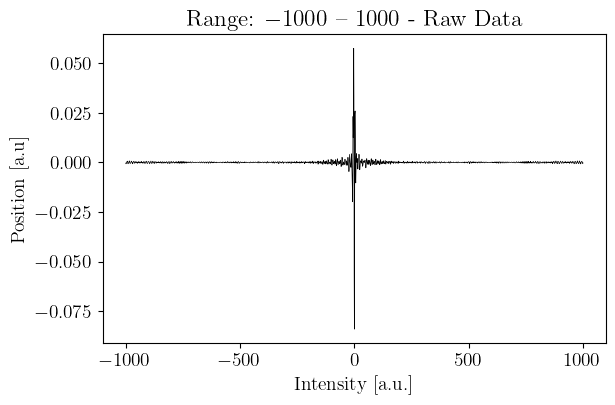

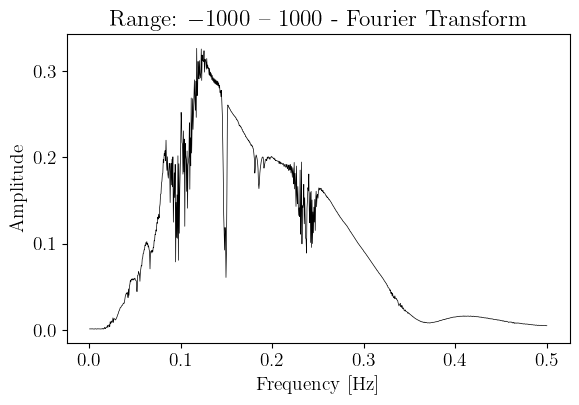

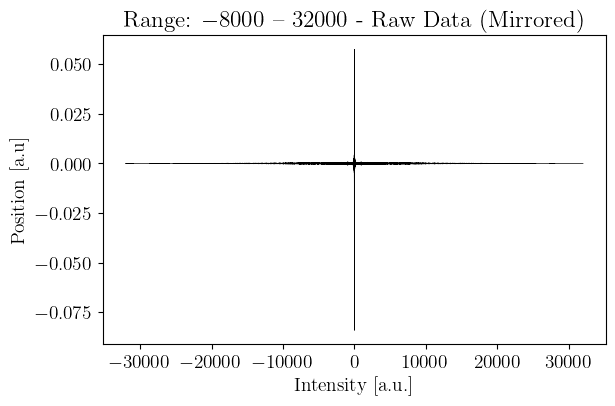

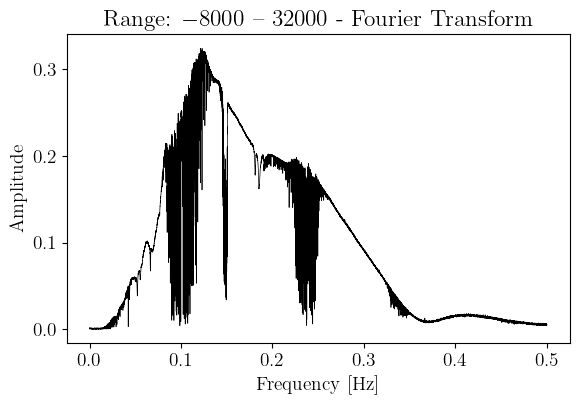

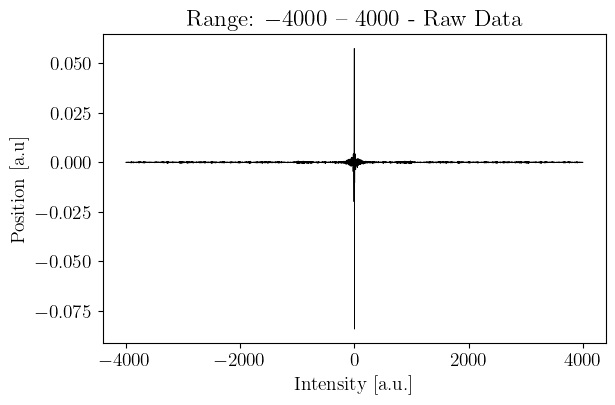

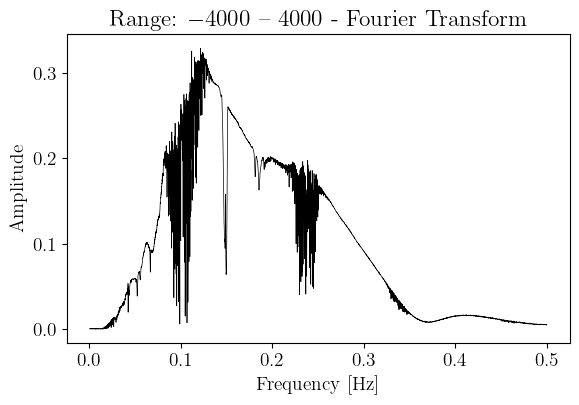

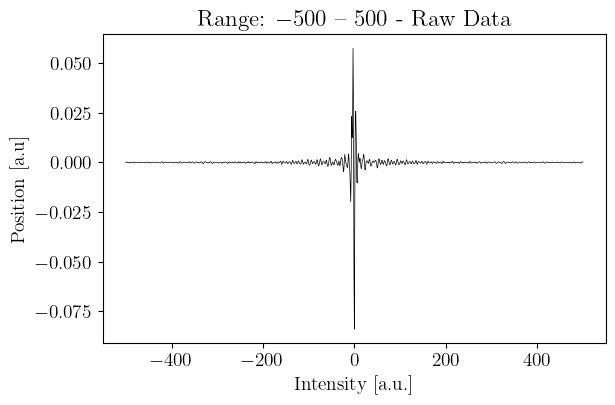

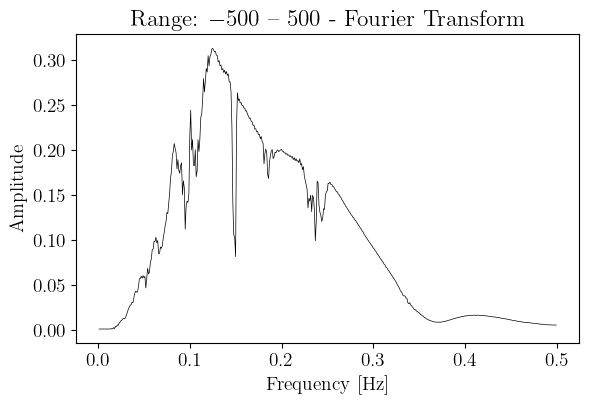

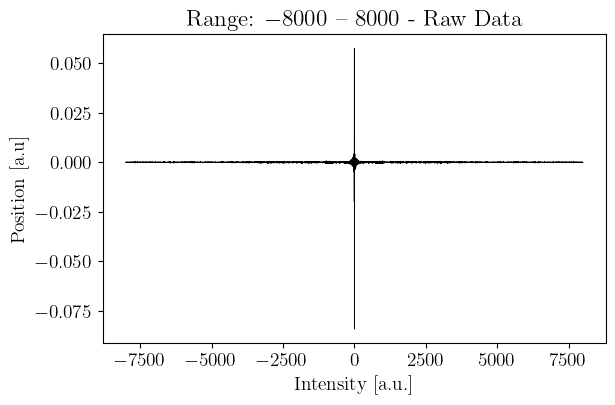

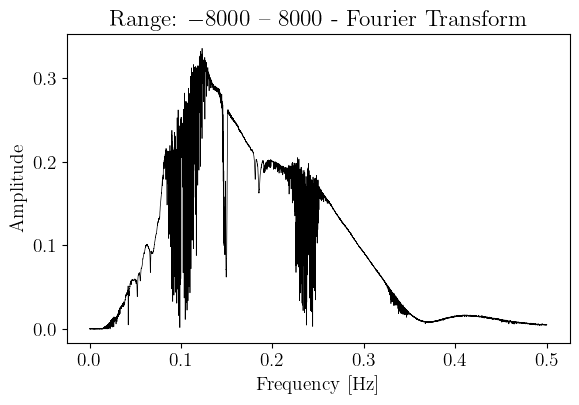

In [211]:
import re

# Plot all data individually
for file, file_data in data:
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]

    # Extract the number from the filename
    match = re.search(r'air(\d+)\.asc', file)
    if match:
        number = match.group(1)
        range_title = f"Range: $-{number}$ -- ${number}$"
    else:
        range_title = "Range: Unknown"

    # Check if the file is 'air 32000'
    if file == 'air32000.asc':
        # Mirror the positive x values to the negative x values
        x_mirrored = np.concatenate([-x[::-1], x])
        y_mirrored = np.concatenate([y[::-1], y])
        
        # Apply Fourier transform to the mirrored y data
        y_fft = np.fft.fft(y)
        x_fft = np.fft.fftfreq(len(y), d=(x_mirrored[1] - x_mirrored[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]

        # Plot the mirrored data
        plt.figure(figsize=set_size(469))
        plt.plot(x_mirrored, y_mirrored, color='black', linewidth=0.5)
        plt.title(f'Range: $-8000$ -- $32000$ - Raw Data (Mirrored)')
        plt.xlabel('Intensity [a.u.]')
        plt.ylabel('Position [a.u]')
        plt.show()

        # Plot the Fourier transformed data (positive frequencies only)
        plt.figure(figsize=set_size(469))
        plt.plot(x_fft_positive, np.abs(y_fft_positive), color='black', linewidth=0.5)
        plt.title(f"Range: $-8000$ -- $32000$ - Fourier Transform")
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')
        plt.show()
    else:
        # Apply Fourier transform to the y data
        y_fft = np.fft.fft(y)
        x_fft = np.fft.fftfreq(len(y), d=(x[1] - x[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]

        # Plot the original data
        plt.figure(figsize=set_size(469))
        plt.plot(x, y, color='black', linewidth=0.5)
        plt.title(f'{range_title} - Raw Data')
        plt.xlabel('Intensity [a.u.]')
        plt.ylabel('Position [a.u]')
        plt.show()

        # Plot the Fourier transformed data (positive frequencies only)
        plt.figure(figsize=set_size(469))
        plt.plot(x_fft_positive, np.abs(y_fft_positive), color='black', linewidth=0.5)
        plt.title(f"{range_title} - Fourier Transform")
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Amplitude')
        plt.show()

### Calibration

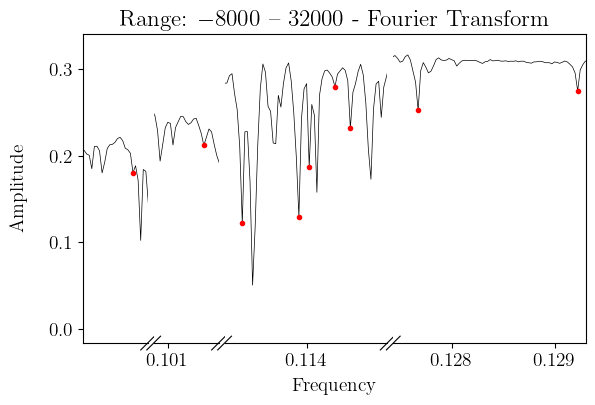

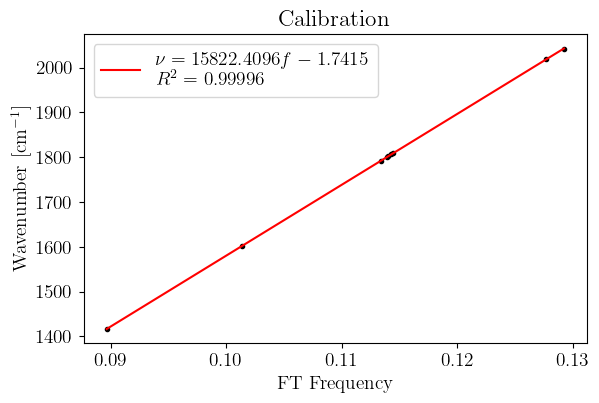

Linear fit coefficients: [ 1.58224096e+04 -1.74152090e+00]


In [239]:
# Get the path to the air8000.asc file 
file_path = os.path.join(path, 'air32000.asc')

# Open the file
with open(file_path, 'r') as f:
    # Read the lines of the file
    lines = f.readlines()
    
    # Initialize the data list for the current file
    file_data = []
    
    # Loop through the lines of the file
    for line in lines:
        # Check if the line contains the data
        if line.startswith('#DATA'):
            # Get the index of the line
            index = lines.index(line)
            
            # Loop through the lines after the line that says #DATA
            for i in range(index + 1, len(lines)):
                # Replace commas with dots in the line
                line = lines[i].replace('.', '.')
                
                # Split the line into values and convert them to floats
                values = [float(value) for value in line.split()]
                
                # Append the values to the file data list
                file_data.append(values)
    
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]

    # Apply Fourier transform to the y data
    y_fft = np.fft.fft(y)
    x_fft = np.fft.fftfreq(len(y), d=(x[1] - x[0]))

    # Filter for positive frequencies
    positive_freqs = x_fft > 0
    x_fft_positive = x_fft[positive_freqs]
    y_fft_positive = y_fft[positive_freqs]

    # Find dips (local minima) in the Fourier transformed data
    inverted_y_fft_positive = -np.abs(y_fft_positive)
    dips, _ = find_peaks(inverted_y_fft_positive)

    # Find the closest dips to the target frequencies
    target_freqs = [0.0896, 0.1013, 0.1292, 0.1276, 0.1134, 0.1139, 0.1140, 0.1142, 0.1145]
    closest_dips = {}
    for target in target_freqs:
        closest_dip = min(dips, key=lambda dip: abs(x_fft_positive[dip] - target))
        closest_dips[target] = (x_fft_positive[closest_dip], np.abs(y_fft_positive[closest_dip]))

    # Extract the x values of the closest dips and sort them
    fft_peaks = sorted([freq for freq, _ in closest_dips.values()])

    # Plot the Fourier transformed data (positive frequencies only) using brokenaxes
    fig = plt.figure(figsize=set_size(469))
    bax = brokenaxes(xlims=((0.08916, 0.08979), (0.10086, 0.10149), (0.1132, 0.11478), (0.12743, 0.1293)), wspace=.05)
    bax.plot(x_fft_positive, np.abs(y_fft_positive), color='black', linewidth=0.5)
    bax.set_title(f"Range: $-8000$ -- $32000$ - Fourier Transform")
    bax.set_xlabel('Frequency', labelpad=25)
    bax.set_ylabel('Amplitude', labelpad=40)

    # Highlight the closest dips
    for target, (freq, amplitude) in closest_dips.items():
        bax.plot(freq, amplitude, 'r.')  # Red dot for the dip
        
    bax.big_ax.spines['right'].set_visible(True)
    bax.big_ax.spines['top'].set_visible(True)

    plt.show()

# Provided data
data = {
    'Theoretical': fft_peaks,
    'Experimental': [1416.08, 1601.20, 1792.65, 1799.61, 1802.47, 1807.70, 1810.62, 2018.32, 2041.3]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fit a linear function to the data
coefficients = np.polyfit(df['Theoretical'], df['Experimental'], 1)
linear_fit = np.poly1d(coefficients)
R2 = np.corrcoef(df['Theoretical'], df['Experimental'])[0, 1] ** 2

# Plot Theoretical vs Experimental with linear fit
plt.figure(figsize=set_size(469))
plt.plot(df['Theoretical'], linear_fit(df['Theoretical']), color='red', label=f'$\\nu = {coefficients[0]:.4f}f  {coefficients[1]:.4f}$ \n $R^2 = {R2:.5f}$')
plt.scatter(df['Theoretical'], df['Experimental'], marker='.', color='black')
plt.xlabel('FT Frequency')
plt.ylabel('Wavenumber [cm$^{-1}$]')
plt.title('Calibration')
plt.legend()
plt.show()

print("Linear fit coefficients:", coefficients)

### Zerofilling

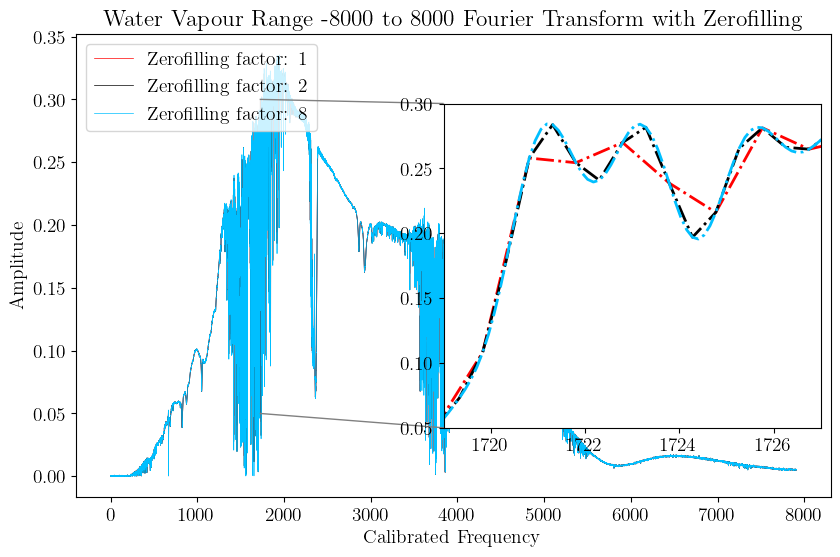

In [129]:
# Function to apply the linear transformation
def apply_calibration(x, coefficients):
    return coefficients[0] * x + coefficients[1]

# Get the path to the air8000.asc file
file_path = os.path.join(path, 'air8000.asc')

# Open the file
with open(file_path, 'r') as f:
    # Read the lines of the file
    lines = f.readlines()
    
    # Initialize the data list for the current file
    file_data = []
    
    # Loop through the lines of the file
    for line in lines:
        # Check if the line contains the data
        if line.startswith('#DATA'):
            # Get the index of the line
            index = lines.index(line)
            
            # Loop through the lines after the line that says #DATA
            for i in range(index + 1, len(lines)):
                # Replace commas with dots in the line
                line = lines[i].replace('.', '.')
                
                # Split the line into values and convert them to floats
                values = [float(value) for value in line.split()]
                
                # Append the values to the file data list
                file_data.append(values)
    
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]

    # Fourier Transform with different zerofilling factors
    zerofilling_factors = [1, 2, 8]
    colors = ['red', 'black', 'deepskyblue']  # Define colors for each zerofilling factor
    
    # Plot the Fourier transformed data (positive frequencies only) using brokenaxes
    fig, ax = plt.subplots(figsize=set_size(469*1.5))

    for i, (factor, color) in enumerate(zip(zerofilling_factors, colors)):
        # Apply Fourier transform to the y data
        y_fft = np.fft.fft(y, n=len(y) * factor)
        x_fft = np.fft.fftfreq(len(y) * factor, d=(x[1] - x[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]

        # Apply calibration to x values
        x_fft_calibrated = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only)
        ax.plot(x_fft_calibrated, np.abs(y_fft_positive), label=f'Zerofilling factor: {factor}', linewidth=0.5, color=color)
    
    ax.set_title(f"Water Vapour Range -8000 to 8000 Fourier Transform with Zerofilling")
    ax.set_xlabel('Calibrated Frequency')
    ax.set_ylabel('Amplitude')
    ax.legend(loc='upper left')

    # Add inset axes at frequency 3000
    inset_ax = inset_axes(ax, width="50%", height="70%", loc='center right')
    inset_ax.set_xlim(1719, 1727)  
    inset_ax.set_ylim(0.05, 0.3)

    for i, (factor, color) in enumerate(zip(zerofilling_factors, colors)):
        # Apply Fourier transform to the y data
        y_fft = np.fft.fft(y, n=len(y) * factor)
        x_fft = np.fft.fftfreq(len(y) * factor, d=(x[1] - x[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]

        # Apply calibration to x values
        x_fft_calibrated = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only) in the inset
        inset_ax.plot(x_fft_calibrated, np.abs(y_fft_positive), linewidth=2, linestyle='-.', color=color)
    
    # Connect the inset axes with the main axes
    mark_inset(ax, inset_ax, loc1=2, loc2=3, fc="none", ec="0.5")

    plt.show()

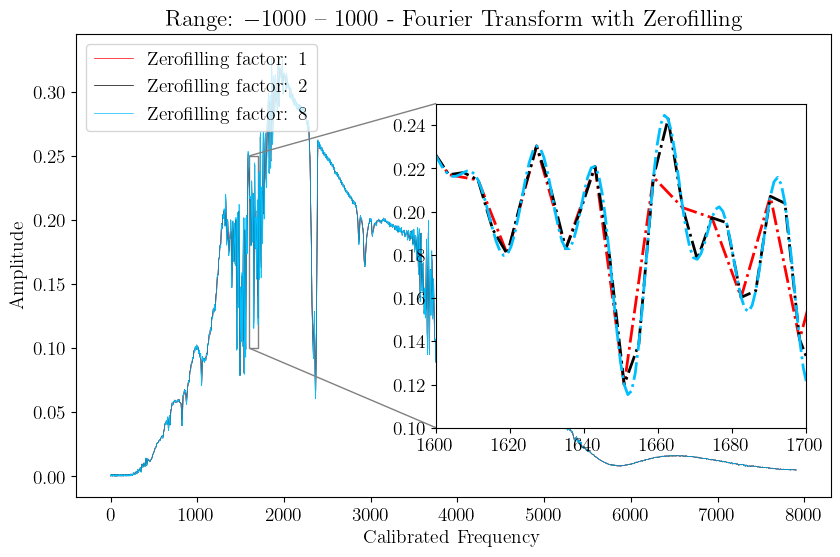

In [217]:
# Function to apply the linear transformation
def apply_calibration(x, coefficients):
    return coefficients[0] * x + coefficients[1]

# Get the path to the air8000.asc file
file_path = os.path.join(path, 'air1000.asc')

# Open the file
with open(file_path, 'r') as f:
    # Read the lines of the file
    lines = f.readlines()
    
    # Initialize the data list for the current file
    file_data = []
    
    # Loop through the lines of the file
    for line in lines:
        # Check if the line contains the data
        if line.startswith('#DATA'):
            # Get the index of the line
            index = lines.index(line)
            
            # Loop through the lines after the line that says #DATA
            for i in range(index + 1, len(lines)):
                # Replace commas with dots in the line
                line = lines[i].replace('.', '.')
                
                # Split the line into values and convert them to floats
                values = [float(value) for value in line.split()]
                
                # Append the values to the file data list
                file_data.append(values)
    
    # Convert the data to a numpy array
    data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]

    # Fourier Transform with different zerofilling factors
    zerofilling_factors = [1, 2, 8]
    colors = ['red', 'black', 'deepskyblue']  # Define colors for each zerofilling factor
    
    # Plot the Fourier transformed data (positive frequencies only) using brokenaxes
    fig, ax = plt.subplots(figsize=set_size(469*1.5))

    for i, (factor, color) in enumerate(zip(zerofilling_factors, colors)):
        # Apply Fourier transform to the y data
        y_fft = np.fft.fft(y, n=len(y) * factor)
        x_fft = np.fft.fftfreq(len(y) * factor, d=(x[1] - x[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]

        # Apply calibration to x values
        x_fft_calibrated = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only)
        ax.plot(x_fft_calibrated, np.abs(y_fft_positive), label=f'Zerofilling factor: {factor}', linewidth=0.5, color=color)
    
    ax.set_title(f"Range: $-1000$ -- $1000$ - Fourier Transform with Zerofilling")
    ax.set_xlabel('Calibrated Frequency')
    ax.set_ylabel('Amplitude')
    ax.legend(loc='upper left')

    # Add inset axes at frequency 3000
    inset_ax = inset_axes(ax, width="50%", height="70%", loc='center right', bbox_to_anchor=(0, 0, 0.98, 1), bbox_transform=ax.transAxes)
    inset_ax.set_xlim(1600, 1700)  
    inset_ax.set_ylim(0.1, 0.25)

    for i, (factor, color) in enumerate(zip(zerofilling_factors, colors)):
        # Apply Fourier transform to the y data
        y_fft = np.fft.fft(y, n=len(y) * factor)
        x_fft = np.fft.fftfreq(len(y) * factor, d=(x[1] - x[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]

        # Apply calibration to x values
        x_fft_calibrated = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only) in the inset
        inset_ax.plot(x_fft_calibrated, np.abs(y_fft_positive), linewidth=2, linestyle='-.', color=color)
    
    # Connect the inset axes with the main axes
    mark_inset(ax, inset_ax, loc1=2, loc2=3, fc="none", ec="0.5")

    plt.show()

### Apodization

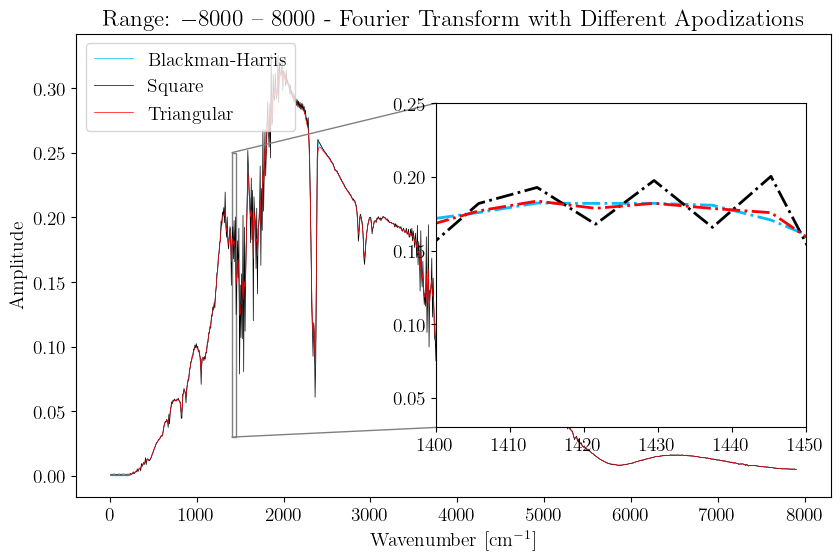

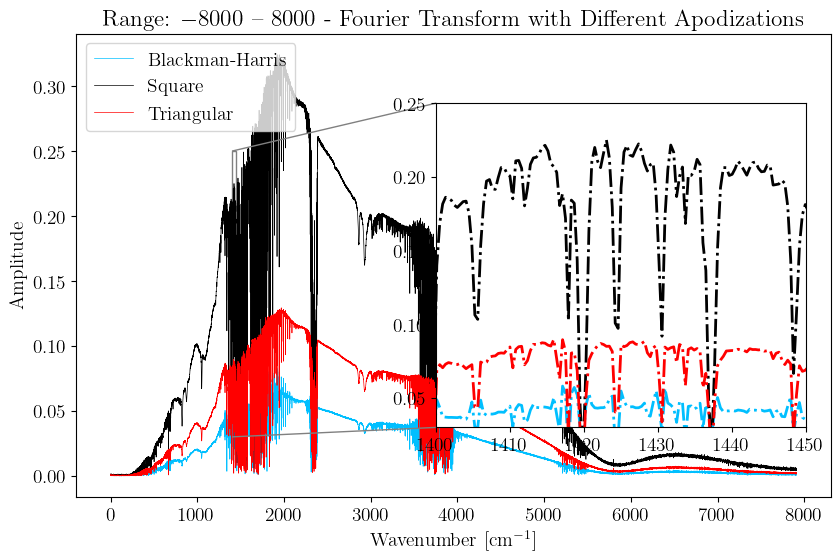

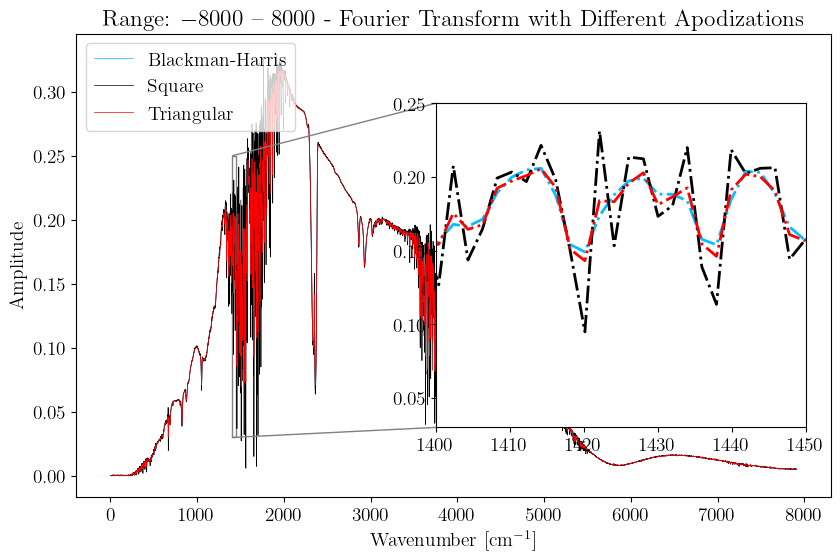

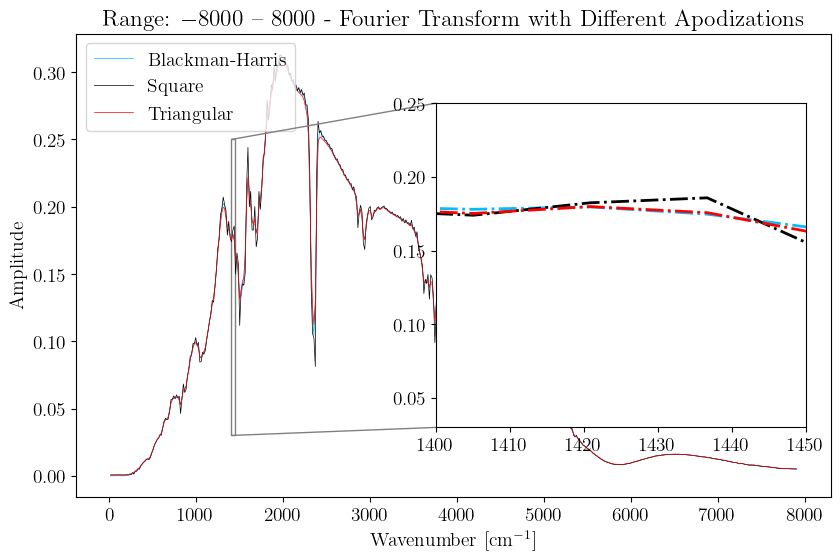

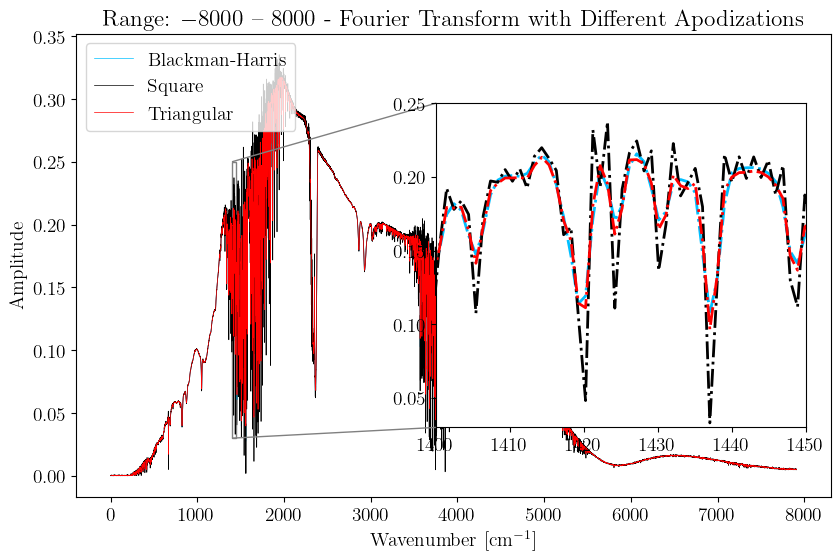

In [202]:


# Function to apply the linear transformation
def apply_calibration(x, coefficients):
    return coefficients[0] * x + coefficients[1]

# Define the path to the folder containing the files
folder_path = 'Task 2'

# Define window functions and their corresponding colors
window_functions = {
    'Blackman-Harris': (windows.blackman, 'deepskyblue'),
    'Square': (windows.boxcar, 'black'),
    'Triangular': (windows.triang, 'red')
}

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.asc'):
        file_path = os.path.join(folder_path, filename)
        
        # Open the file
        with open(file_path, 'r') as f:
            # Read the lines of the file
            lines = f.readlines()
            
            # Initialize the data list for the current file
            file_data = []
            
            # Loop through the lines of the file
            for line in lines:
                # Check if the line contains the data
                if line.startswith('#DATA'):
                    # Get the index of the line
                    index = lines.index(line)
                    
                    # Loop through the lines after the line that says #DATA
                    for i in range(index + 1, len(lines)):
                        # Replace commas with dots in the line
                        line = lines[i].replace('.', '.')
                        
                        # Split the line into values and convert them to floats
                        values = [float(value) for value in line.split()]
                        
                        # Append the values to the file data list
                        file_data.append(values)
            
            # Convert the data to a numpy array
            data_array = np.vstack(file_data)
        
        # Get data
        x = data_array[:, 0]
        y = data_array[:, 1]
        
        # Ensure the length of the window functions matches the length of the data
        N = len(y)
        
        # Plot the Fourier transformed data for each window function
        fig, ax = plt.subplots(figsize=set_size(469*1.5))
        # Add inset axes at frequency 3000
        inset_ax = inset_axes(ax, width="50%", height="70%", loc='center right', bbox_to_anchor=(0, 0, 0.98, 1), bbox_transform=ax.transAxes)
        inset_ax.set_xlim(1400, 1450)  
        inset_ax.set_ylim(0.03, 0.25)
        mark_inset(ax, inset_ax, loc1=2, loc2=3, fc="none", ec="0.5")
        
        for window_name, (window_func, color) in window_functions.items():
            # Apply window to the y data
            window = window_func(N)
            y_windowed = y * window
            
            # Apply Fourier transform to the windowed y data
            y_fft = np.fft.fft(y_windowed)
            x_fft = np.fft.fftfreq(N, d=(x[1] - x[0]))
            
            # Filter for positive frequencies
            positive_freqs = x_fft > 0
            x_fft_positive = apply_calibration(x_fft[positive_freqs], coefficients)
            y_fft_positive = y_fft[positive_freqs]
            
            # Plot the Fourier transformed data (positive frequencies only)
            ax.plot(x_fft_positive, np.abs(y_fft_positive), linewidth=0.5, label=window_name, color=color)
            inset_ax.plot(x_fft_positive, np.abs(y_fft_positive), linewidth=2, linestyle='-.', color=color)
        
        ax.set_title(f"{range_title} - Fourier Transform with Different Apodizations")
        ax.set_xlabel('Wavenumber [cm$^{-1}$]')
        ax.set_ylabel('Amplitude')
        ax.legend(loc = 'upper left')

        plt.show()

### Comparison

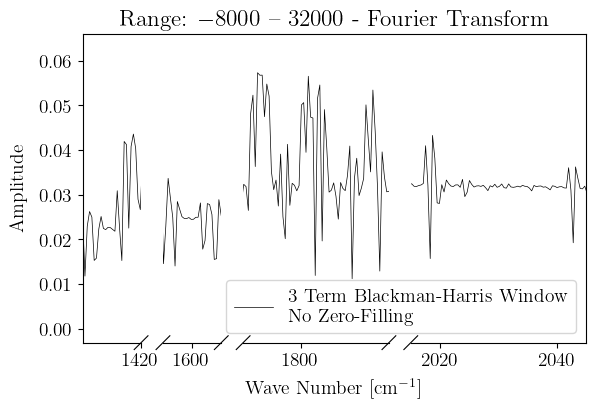

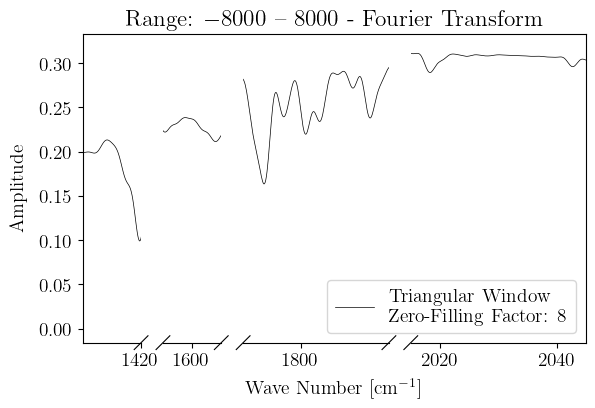

In [268]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows
from brokenaxes import brokenaxes

# Function to apply the linear transformation
def apply_calibration(x, coefficients):
    return coefficients[0] * x + coefficients[1]

# Define the path to the folder containing the files
folder_path = 'Task 2'

# Define the specific files and their conditions
files_conditions = {
    'air32000.asc': {'window_func': windows.blackmanharris, 'zero_fill_factor': 0, 'color': 'blue', 'mirror_x': True},
    'air8000.asc': {'window_func': windows.triang, 'zero_fill_factor': 8, 'color': 'red', 'mirror_x': False}
}

# Define the x-axis limits for the broken axis
xlims = ((1410, 1420), (1595, 1605), (1790, 1815), (2015, 2045))

# Loop through each specified file and its conditions
for filename, conditions in files_conditions.items():
    file_path = os.path.join(folder_path, filename)
    
    # Open the file
    with open(file_path, 'r') as f:
        # Read the lines of the file
        lines = f.readlines()
        
        # Initialize the data list for the current file
        file_data = []
        
        # Loop through the lines of the file
        for line in lines:
            # Check if the line contains the data
            if line.startswith('#DATA'):
                # Get the index of the line
                index = lines.index(line)
                
                # Loop through the lines after the line that says #DATA
                for i in range(index + 1, len(lines)):
                    # Replace commas with dots in the line
                    line = lines[i].replace('.', '.')
                    
                    # Split the line into values and convert them to floats
                    values = [float(value) for value in line.split()]
                    
                    # Append the values to the file data list
                    file_data.append(values)
        
        # Convert the data to a numpy array
        data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]
    
    # Apply the window function
    window = conditions['window_func'](len(y))
    y_windowed = y * window
    
    # Zero-filling
    zero_fill_factor = conditions['zero_fill_factor']
    if zero_fill_factor > 0:
        y_windowed = np.pad(y_windowed, (0, len(y_windowed) * zero_fill_factor), 'constant')
    
    # Check if the file is 'air32000.asc'
    if filename == 'air32000.asc':
        # Mirror the positive x values to the negative x values
        x_mirrored = np.concatenate([-x[::-1], x])
        y_mirrored = np.concatenate([y[::-1], y])
        
        # Apply Fourier transform to the mirrored y data
        y_fft = np.fft.fft(y_windowed)
        x_fft = np.fft.fftfreq(len(y_windowed), d=(x_mirrored[1] - x_mirrored[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]
        x_fft_positive = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only)
        fig = plt.figure(figsize=set_size(469))
        bax = brokenaxes(xlims=xlims, hspace=.05)
        bax.plot(x_fft_positive, np.abs(y_fft_positive), linewidth=0.5, color='black', label=f'3 Term Blackman-Harris Window \n No Zero-Filling')
        bax.set_title(f"Range: $-8000$ -- $32000$ - Fourier Transform")
        bax.set_xlabel('Wave Number [cm$^{-1}$]', labelpad=25)
        bax.set_ylabel('Amplitude', labelpad=40)
        bax.legend(loc = 'lower right')
        bax.big_ax.spines['right'].set_visible(True)
        bax.big_ax.spines['top'].set_visible(True)
        plt.show()
    else:
        # Apply Fourier transform to the y data
        y_fft = np.fft.fft(y_windowed)
        x_fft = np.fft.fftfreq(len(y_windowed), d=(x[1] - x[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]
        x_fft_positive = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only)
        fig = plt.figure(figsize=set_size(469))
        bax = brokenaxes(xlims=xlims, hspace=.05)
        bax.plot(x_fft_positive, np.abs(y_fft_positive), color='black', linewidth=0.5, label=f'Triangular Window \n Zero-Filling Factor: 8')
        bax.set_title(f"Range: $-8000$ -- $8000$ - Fourier Transform")
        bax.set_xlabel('Wave Number [cm$^{-1}$]', labelpad=25)
        bax.set_ylabel('Amplitude', labelpad=40)
        bax.legend(loc = 'lower right')
        bax.big_ax.spines['right'].set_visible(True)
        bax.big_ax.spines['top'].set_visible(True)
        plt.show()

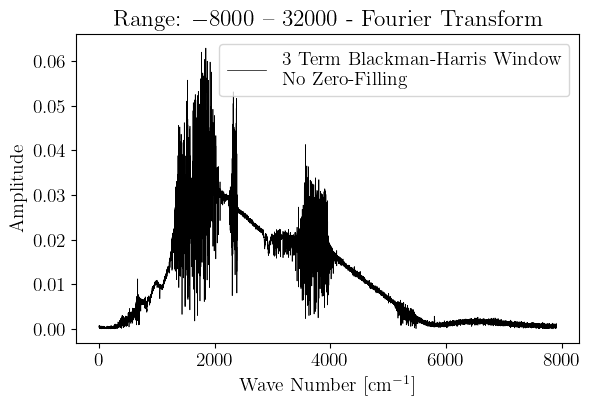

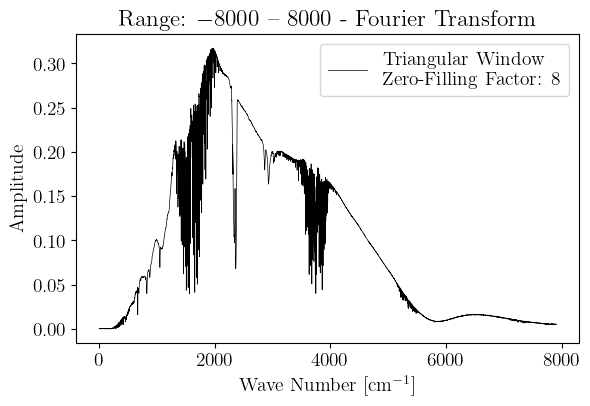

In [269]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

# Function to apply the linear transformation
def apply_calibration(x, coefficients):
    return coefficients[0] * x + coefficients[1]

# Define the path to the folder containing the files
folder_path = 'Task 2'

# Define the specific files and their conditions
files_conditions = {
    'air32000.asc': {'window_func': windows.blackmanharris, 'zero_fill_factor': 0, 'color': 'blue', 'mirror_x': True},
    'air8000.asc': {'window_func': windows.triang, 'zero_fill_factor': 8, 'color': 'red', 'mirror_x': False }
}

# Loop through each specified file and its conditions
for filename, conditions in files_conditions.items():
    file_path = os.path.join(folder_path, filename)
    
    # Open the file
    with open(file_path, 'r') as f:
        # Read the lines of the file
        lines = f.readlines()
        
        # Initialize the data list for the current file
        file_data = []
        
        # Loop through the lines of the file
        for line in lines:
            # Check if the line contains the data
            if line.startswith('#DATA'):
                # Get the index of the line
                index = lines.index(line)
                
                # Loop through the lines after the line that says #DATA
                for i in range(index + 1, len(lines)):
                    # Replace commas with dots in the line
                    line = lines[i].replace('.', '.')
                    
                    # Split the line into values and convert them to floats
                    values = [float(value) for value in line.split()]
                    
                    # Append the values to the file data list
                    file_data.append(values)
        
        # Convert the data to a numpy array
        data_array = np.vstack(file_data)
    
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]
    
    # Apply the window function
    window = conditions['window_func'](len(y))
    y_windowed = y * window
    
    # Zero-filling
    zero_fill_factor = conditions['zero_fill_factor']
    if zero_fill_factor > 0:
        y_windowed = np.pad(y_windowed, (0, len(y_windowed) * zero_fill_factor), 'constant')
    
    # Check if the file is 'air32000.asc'
    if filename == 'air32000.asc':
        # Mirror the positive x values to the negative x values
        x_mirrored = np.concatenate([-x[::-1], x])
        y_mirrored = np.concatenate([y[::-1], y])
        
        # Apply Fourier transform to the mirrored y data
        y_fft = np.fft.fft(y_windowed)
        x_fft = np.fft.fftfreq(len(y_windowed), d=(x_mirrored[1] - x_mirrored[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]
        x_fft_positive = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only)
        plt.figure(figsize=set_size(469))
        plt.plot(x_fft_positive, np.abs(y_fft_positive), linewidth=0.5, color='black', label=f'3 Term Blackman-Harris Window \n No Zero-Filling')
        plt.title(f"Range: $-8000$ -- $32000$ - Fourier Transform")
        plt.xlabel('Wave Number [cm$^{-1}$]')
        plt.ylabel('Amplitude')
        plt.legend()
        
        plt.show()
    else:
        # Apply Fourier transform to the y data
        y_fft = np.fft.fft(y_windowed)
        x_fft = np.fft.fftfreq(len(y_windowed), d=(x[1] - x[0]))

        # Filter for positive frequencies
        positive_freqs = x_fft > 0
        x_fft_positive = x_fft[positive_freqs]
        y_fft_positive = y_fft[positive_freqs]
        x_fft_positive = apply_calibration(x_fft_positive, coefficients)

        # Plot the Fourier transformed data (positive frequencies only)
        plt.figure(figsize=set_size(469))
        plt.plot(x_fft_positive, np.abs(y_fft_positive), color='black', linewidth=0.5, label=f'Triangular Window \n Zero-Filling Factor: 8')
        plt.title(f"Range: $-8000$ -- $8000$ - Fourier Transform")
        plt.xlabel('Wave Number [cm$^{-1}$]')
        plt.ylabel('Amplitude')
        plt.legend()
        
        plt.show()

## Task 3

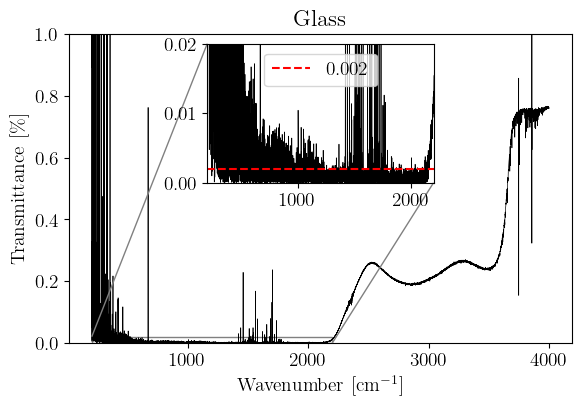

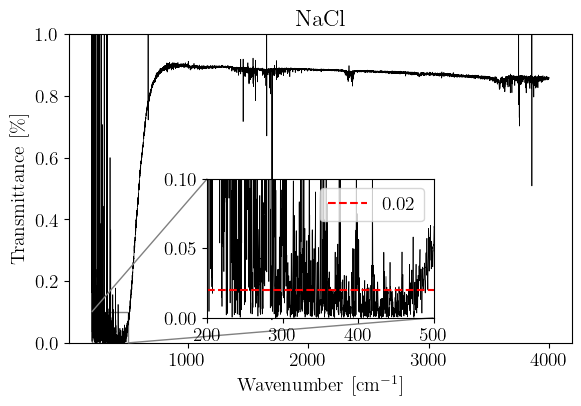

In [274]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Function to read .asc file and extract data
def read_asc_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        file_data = []
        for line in lines:
            if line.startswith('#DATA'):
                index = lines.index(line)
                for i in range(index + 1, len(lines)):
                    line = lines[i].replace(',', '.')
                    values = [float(value) for value in line.split()]
                    file_data.append(values)
    return np.vstack(file_data)

# Get the path to the Task 1 folder
task2_path = os.path.join(cwd, 'Task 1')

# Read the water vapour data
water_vapour_file_path = os.path.join(task2_path, 'Water Vapour.asc')
water_vapour_data = read_asc_file(water_vapour_file_path)
water_vapour_y = water_vapour_data[:, 1]

# Get the path to the Task 3 folder
task3_path = os.path.join(cwd, 'Task 3')

# Get the list of files in the Task 3 folder
files = os.listdir(task3_path)

# Initialize the list of data
data = []

# Loop through the files in the Task 3 folder
for file in files:
    # Check if the file is a .asc file
    if file.endswith('.asc'):
        # Get the path to the file
        file_path = os.path.join(task3_path, file)
        
        # Read the file data
        file_data = read_asc_file(file_path)
        
        # Append the file name and file data to the data list
        data.append((file, file_data))

# Plot all data individually
for file, file_data in data:
    data_array = np.vstack(file_data)
    # Get data
    x = data_array[:, 0]
    y = data_array[:, 1]
    
    # Normalize y by water vapour y
    y_normalized = np.abs(y) / np.abs(water_vapour_y)
    
    # Create a new figure
    fig, ax = plt.subplots(figsize=set_size(469))
    
    # Plot
    ax.plot(x, y_normalized, color='black', linewidth=0.5)
    
    # Remove the .asc extension from the file name
    file_name_without_ext = os.path.splitext(file)[0]
    
    # Set the title of the plot
    ax.set_title(file_name_without_ext)
    
    # Set the labels of the x and y axes
    ax.set_xlabel('Wavenumber [cm$^{-1}$]')
    ax.set_ylabel('Transmittance [$\%$]')

    plt.ylim(0, 1)
    
    # Create an inset axis
    if 'Glass' in file:
        ax_inset = inset_axes(ax, width="45%", height="45%", loc='upper center')
        ax_inset.set_xlim(200, 2200)
        ax_inset.set_ylim(0, 0.02)
        ax_inset.plot(x, y_normalized, color='black', linewidth=0.5)
        ax_inset.axhline(0.002, color='red', linestyle='--', label='0.002')
        mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
        ax_inset.legend()
    else:
        ax_inset = inset_axes(ax, width="45%", height="45%", loc='lower center', bbox_to_anchor=(0, 0.05, 1, 1), bbox_transform=ax.transAxes)
        ax_inset.set_xlim(200, 500)
        ax_inset.set_ylim(0, 0.1)
        mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
        ax_inset.plot(x, y_normalized, color='black', linewidth=0.5)
        ax_inset.axhline(0.02, color='red', linestyle='--', label='0.02')
        ax_inset.legend()
        
    plt.savefig(f'{file_name_without_ext}.png')
    plt.show()